<h1>CNN MNIST</h1>


<h1>Importing required modules</h1>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

<h1>Loading Data</h1>
<br/>
<p>Loading MNIST data </p>

In [17]:
train_batchsize = 100
test_batchsize = 100
resized_img_size = 28
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(resized_img_size, resized_img_size)),
                               torchvision.transforms.ToTensor()
                             ])
train_data = torchvision.datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform) 
test_data = torchvision.datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=train_batchsize,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=test_batchsize,
                                         shuffle=True)

<h1>Visualize Data</h1>

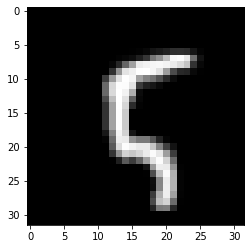

In [18]:
plt.imshow(train_data[100][0][0],cmap='gray')

In [19]:
import torch.nn as nn
import torch.nn.functional as F 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,3,(5,5),padding = "same")
        self.pool1 = nn.MaxPool2d((3,3),stride=2)
        self.conv2 = nn.Conv2d(3,7,(5,5),padding="same")
        self.pool2 = nn.MaxPool2d((3,3),stride=2)
        self.conv3 = nn.Conv2d(7,9,(5,5),padding="same")
        self.pool3 = nn.MaxPool2d((3,3),stride=2)
        self.linearlayer = nn.Linear(144,256)
        self.linearlayer2 = nn.Linear(256,10)
    def forward(self,X):
        X = self.pool1(F.relu(self.conv1(X)))
        X = self.pool2(F.relu(self.conv2(X)))
        X = self.pool3(F.relu(self.conv3(X)))
        X = X.view(-1,81) #Flatten
        #X = F.relu(self.linearlayer(X))
        #X = self.linearlayer2(X)
        return X
model = Net()
#print(train_loader)
#print(model([train_data[0][0]]))

<h1>CNN model</h1>

In [20]:
from ADAM import ADAM
trainingLoss = {}
# Fixed seed for random weight initialization (to keep the weights same for all
# the models)
seed = 11 
#torch.manual_seed(3)
def trainDifOptimizer(optmzr):
    torch.manual_seed(seed)
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = ADAM(model.parameters(), lr=0.01) # lr=0.001 -> standard
    else:
      optimizer = getattr(torch.optim, optmzr)(model.parameters(), lr=0.01)
    
    n_epochs = 15  # suggest training between 20-50 epochs

    model.train()  # prep model for training
    trainLossForOptimizer = []
    print("Optimizer : ", optmzr, "\n")
    for epoch in range(n_epochs):
        train_loss = 0.0

        for data, target in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

        # print training statistics
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        trainLossForOptimizer.append(train_loss)
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1,
            train_loss
        ))
    torch.save(model, 'saved_models/'+optmzr+'_cnn_model')
    trainingLoss[optmzr] = trainLossForOptimizer
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam', 'RMSprop','SGD','Adadelta','Adam_scratch']

for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)
print(trainingLoss)

Optimizer :  Adam 

Epoch: 1 	Training Loss: 1.993826
Epoch: 2 	Training Loss: 1.304850
Epoch: 3 	Training Loss: 1.181985
Epoch: 4 	Training Loss: 1.105595
Epoch: 5 	Training Loss: 1.036937
Epoch: 6 	Training Loss: 1.008230
Epoch: 7 	Training Loss: 0.985504
Epoch: 8 	Training Loss: 0.962163
Epoch: 9 	Training Loss: 0.953557
Epoch: 10 	Training Loss: 0.938812
Epoch: 11 	Training Loss: 0.926842
Epoch: 12 	Training Loss: 0.927297
Epoch: 13 	Training Loss: 0.907694
Epoch: 14 	Training Loss: 0.908596
Epoch: 15 	Training Loss: 0.894461

-----------------------------------------

Optimizer :  RMSprop 

Epoch: 1 	Training Loss: 2.226989
Epoch: 2 	Training Loss: 1.741132
Epoch: 3 	Training Loss: 1.641440
Epoch: 4 	Training Loss: 1.587898
Epoch: 5 	Training Loss: 1.551992
Epoch: 6 	Training Loss: 1.519631
Epoch: 7 	Training Loss: 1.491073
Epoch: 8 	Training Loss: 1.460521
Epoch: 9 	Training Loss: 1.448956
Epoch: 10 	Training Loss: 1.438098
Epoch: 11 	Training Loss: 1.424818
Epoch: 12 	Training L

NameError: name 'trainingLoss' is not defined

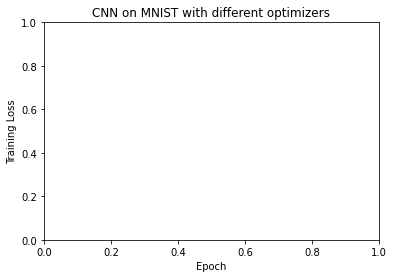

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Xval = np.arange(1, 16,1)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("CNN on MNIST with different optimizers")  # add title
for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()